## generating genotypes from amplicon sequencing data

In [1]:
import ingenos
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

##### set base directory

In [2]:
base = "/afs/crc.nd.edu/group/BesanskyNGS/data05/comp_karyo/data/amplicon_sequencing"

##### read in data

In [3]:
output = pd.read_csv(base + "/no_pilot_data_output/gambiae_genotypes.csv", index_col=False)

trimmed = output.set_index("Sample").iloc[:,5:]

column_list =\
["_".join(item[2:]) for item in output.set_index("Sample").iloc[:,5:].columns.str.split('_')]

##### add species information to the raw data, the calls

In [4]:
cyto = pd.read_excel(
    base + "/metadata/AGAM_All_10_Plates_updated_040820.xls")

cyto.head()

,Plate name,Row,Column,VOLUME,CONC,tubeID,village,taxon,Xchrom,j,...,d,u,2La,karyotype,ovaries,notes1,Reader,Priority of extraction,Corrected,Uncertain
0,PLATE_01,A,1,25UL,NaN,BF0600001,Kagamzince,M,ag,0,...,0,1,2,-1--12,h,NaN,MP,1,no,no
1,PLATE_01,A,2,25UL,NaN,BF0600005,Kagamzince,M,ag,0,...,1,0,2,-1-1-2,h,NaN,MP,1,no,no
2,PLATE_01,A,3,25UL,NaN,BF0600012,Kagamzince,M,ag,0,...,0,0,2,-1---2,NaN,NaN,GM,3,no,no
3,PLATE_01,A,4,25UL,NaN,BF0600024,Kagamzince,M,ag,0,...,1,0,2,-1-1-2,NaN,NaN,GM,3,no,no
4,PLATE_01,A,5,25UL,NaN,BF0600028,Kagamzince,M,ag,0,...,0,0,2,-11--2,NaN,NaN,GM,3,no,no


##### clean the metadata: keep only the necessary columns, standardize values, and rename columns

In [5]:
cyto = cyto[["Plate name", "Row", "Column", "tubeID", "village","taxon","Xchrom","2La","j",
             "b","c","d","u", "Uncertain"]]

cyto.rename(columns = {"2La" : "a_cyto",
                      "j" : "j_cyto",
                      "b" : "b_cyto",
                      "c" : "c_cyto",
                      "d" : "d_cyto",
                      "u" : "u_cyto",
                      "taxon" : "species"}, inplace=True)

cyto["Specimen"] = cyto["Plate name"].replace(
    regex=True, to_replace="_0", value="").replace(
    regex=True, to_replace="_", value="") +\
"_" + cyto["Row"].map(str) + cyto["Column"].astype(str).str.zfill(2)

##### trim and rename the indices for the calls

In [6]:
trimmed.reset_index(inplace=True)

IDs = [item[-2] + "_" + item[-1] for item in trimmed["Sample"].str.split("_")]

trimmed["Specimen"] = pd.Series(IDs)
trimmed["Specimen"] = trimmed["Specimen"].str.upper()

columns = trimmed.columns

trimmed = pd.merge(trimmed, cyto, left_on = "Specimen", right_on = "Specimen")\
[np.append(columns, "species")].set_index(["Specimen","species"])

trimmed.head()

,,Sample,2L_20674783_a,2L_20726658_a,2L_20813877_a,2L_20995428_a,2L_21120275_a,2L_21148772_a,2L_21315321_a,2L_21476016_a,2L_21565787_a,...,2R_36220209_d,2R_36220633_d,2R_36235759_d,2R_36275729_d,2R_36462129_d,2R_38275741_d,2R_38612599_d,2R_39968694_d,2R_42168396_d,2R_42235046_d
Specimen,species,,,,,,,,,,,,,,,,,,,,,
PLATE2_A01,M,GTseq_003_GTseq-i5_01_Plate2_A01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PLATE2_B01,S,GTseq_003_GTseq-i5_02_Plate2_B01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PLATE2_C01,S,GTseq_003_GTseq-i5_03_Plate2_C01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PLATE2_D01,M,GTseq_003_GTseq-i5_04_Plate2_D01,22,22,22,22,22,22,22,22,22,...,11,11,12,11,11,11,11,11,11,11
PLATE2_E01,M,GTseq_003_GTseq-i5_05_Plate2_E01,22,22,22,22,22,22,22,22,22,...,11,11,11,11,11,11,11,11,11,11


In [7]:
trimmed.drop(columns=["Sample"], inplace=True)

trimmed = trimmed.T

trimmed["label"] = column_list

trimmed["assay"] = trimmed.index

##### drop unused partitions, and adjust labels accordingly

In [8]:
trimmed = trimmed.loc[trimmed["label"] != "c_gam", :]
trimmed = trimmed.loc[trimmed["label"] != "cu", :]
trimmed = trimmed.loc[trimmed["label"] != "c_col_Bam", :]

trimmed.loc[trimmed["label"] == "c_gambiae_no_u", "label"] = "c_gam"

trimmed = trimmed.reset_index(drop=True).set_index(["label","assay"]).T

trimmed.head()

label                          a                                            \
assay              2L_20674783_a 2L_20726658_a 2L_20813877_a 2L_20995428_a   
Specimen   species                                                           
PLATE2_A01 M                   0             0             0             0   
PLATE2_B01 S                   0             0             0             0   
PLATE2_C01 S                   0             0             0             0   
PLATE2_D01 M                  22            22            22            22   
PLATE2_E01 M                  22            22            22            22   

label                                                                       \
assay              2L_21120275_a 2L_21148772_a 2L_21315321_a 2L_21476016_a   
Specimen   species                                                           
PLATE2_A01 M                   0             0             0             0   
PLATE2_B01 S                   0             0             0             0   
PLATE2_C01 S                   0             0             0             0   
PLATE2_D01 M                  22            22            22            22   
PLATE2_E01 M                  22            22            22            22   

label                                           ...             d  \
assay              2L_21565787_a 2L_21925603_a  ... 2R_36220209_d   
Specimen   species                              ...                 
PLATE2_A01 M                   0             0  ...             0   
PLATE2_B01 S                   0             0  ...             0   
PLATE2_C01 S                   0             0  ...             0   
PLATE2_D01 M                  22            22  ...            11   
PLATE2_E01 M                  22            22  ...            11   

label                                                                       \
assay              2R_36220633_d 2R_36235759_d 2R_36275729_d 2R_36462129_d   
Specimen   species                                                           
PLATE2_A01 M                   0             0             0             0   
PLATE2_B01 S                   0             0             0             0   
PLATE2_C01 S                   0             0             0             0   
PLATE2_D01 M                  11            12            11            11   
PLATE2_E01 M                  11            11            11            11   

label                                                                       \
assay              2R_38275741_d 2R_38612599_d 2R_39968694_d 2R_42168396_d   
Specimen   species                                                           
PLATE2_A01 M                   0             0             0             0   
PLATE2_B01 S                   0             0             0             0   
PLATE2_C01 S                   0             0             0             0   
PLATE2_D01 M                  11            11            11            11   
PLATE2_E01 M                  11            11            11            11   

label                             
assay              2R_42235046_d  
Specimen   species                
PLATE2_A01 M                   0  
PLATE2_B01 S                   0  
PLATE2_C01 S                   0  
PLATE2_D01 M                  11  
PLATE2_E01 M                  11  

[5 rows x 135 columns]

##### drop a SNP that was erroneously included

In [9]:
trimmed.drop(("d", "2R_36207148_d"), axis=1, inplace=True)

##### replace GT-seq-style genotypes with counts of alternate alleles for ease of downstream analysis

In [10]:
trimmed.replace(to_replace={0 : np.nan,
            11 : 0,
            12 : 1,
            22 : 2}, value=None, inplace=True)

##### drop the first three wells, which were omitted for reasons of technical validation

In [11]:
trimmed.drop("PLATE2_A01", axis=0, level=0, inplace=True)
trimmed.drop("PLATE2_B01", axis=0, level=0, inplace=True)
trimmed.drop("PLATE2_C01", axis=0, level=0, inplace=True)

In [12]:
trimmed.shape

(957, 134)

##### drop the specimens with ambiguous metadata

In [13]:
ambig_metadata = ["PLATE1_C11", "PLATE4_E01", "PLATE4_F05"]

In [14]:
for sample in ambig_metadata:

    trimmed.drop(sample, axis=0, level=0, inplace=True)

In [15]:
cyto = cyto.loc[cyto["Uncertain"] == "no"]

##### examine the data quality

In [16]:
inversions = trimmed.columns.levels[0]

inversions

Index(['a', 'b', 'c_col', 'c_gam', 'd', 'j', 'u'], dtype='object', name='label')

In [17]:
for inversion in inversions:
    
    if inversion == "c_col":
        
        chunk = trimmed.loc[(slice(None), "M"), inversion]
        
    elif inversion == "c_gam":
        
        chunk = trimmed.loc[(slice(None), "S"), inversion]
        
    else:
        
        chunk = trimmed.loc[:, inversion]
        
    print(inversion, "\n")
    print("minimum call rate: ", 1 - chunk.isnull().mean().max())
    print("maximum call rate: ", 1 - chunk.isnull().mean().min(), "\n")

a 

minimum call rate:  0.859538784067086
maximum call rate:  0.9989517819706499 

b 

minimum call rate:  0.9475890985324947
maximum call rate:  0.9979035639412998 

c_col 

minimum call rate:  0.6891891891891893
maximum call rate:  1.0 

c_gam 

minimum call rate:  0.8738532110091743
maximum call rate:  0.9977064220183486 

d 

minimum call rate:  0.9224318658280922
maximum call rate:  0.9989517819706499 

j 

minimum call rate:  0.9129979035639413
maximum call rate:  0.9989517819706499 

u 

minimum call rate:  0.0
maximum call rate:  0.9989517819706499 



##### reshape the call rate data for ease of analysis

In [18]:
missing_df = pd.DataFrame(columns = ["label", "n_called"])

for inversion in inversions:
    
    if inversion == "c_col":

        chunk = trimmed.loc[(slice(None), "M"), inversion]

    elif inversion == "c_gam":

        chunk = trimmed.loc[(slice(None), "S"), inversion]

    else:

        chunk = trimmed.loc[:,inversion]

    n_specs = chunk.shape[0]
    n_snps = chunk.shape[1]
    
    missing_df = missing_df.append(pd.DataFrame({"label" : [inversion] * n_snps,
                 "n_called" : ((1-(np.sum(chunk.isnull(), axis=0) / n_specs)) * 100).values}))

missing_df.reset_index(inplace=True, drop=True)

In [19]:
label_positions = {"a" : 11,
                  "b" : 33,
                  "c_col" : 56,
                  "c_gam" : 74.5,
                  "d" : 89.5,
                  "j" : 106.5,
                  "u" : 124.5}

tick_list = list(missing_df.drop_duplicates(subset="label").index)

tick_list.append(len(missing_df))

tick_list

[0, 22, 44, 68, 81, 98, 115, 134]

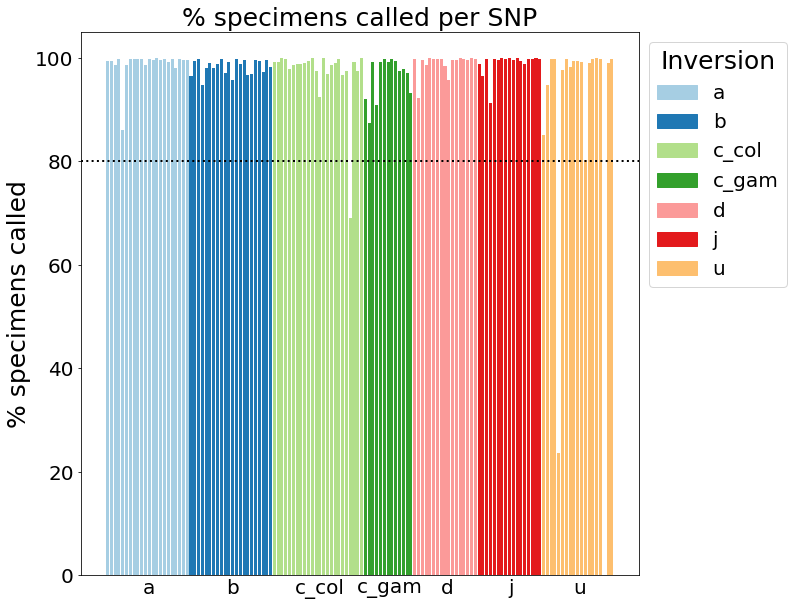

In [20]:
colors_dict = {value : plt.cm.Paired.colors[inversions.get_loc(value)]\
 for value in missing_df["label"].unique()}

fig, ax = plt.subplots(figsize = (10, 10))

ax.bar(x = range(len(missing_df)), 
               height = missing_df["n_called"], 
       color=missing_df["label"].apply(lambda x: colors_dict[x]))
    
ax.tick_params(axis="x", which="both", length=0)
ax.set_xticks(list(label_positions.values()))
ax.set_xticklabels(list(label_positions.keys()))

ax.set_ylabel("% specimens called", fontsize=25)

ax.tick_params(labelsize=20)

color_handles = list()

for inversion in (colors_dict.keys()):
    patch = matplotlib.patches.Patch(color=colors_dict[inversion], label=inversion)
    color_handles.append(patch)

legend = ax.legend(handles = color_handles, bbox_to_anchor=(1, 1), title="Inversion", 
                   fontsize=20)
legend.get_title().set_fontsize(25)

ax.axhline(y=80, linewidth=2, color="black", linestyle=":")

ax.set_title("% specimens called per SNP", fontsize=25)

outString = ingenos.make_date_stamp(base + "/results/missingness_by_inversion")

#plt.savefig(outString, bbox_inches="tight");

##### calculate the average call rate per specimen

In [21]:
(~trimmed.isnull()).mean(axis=1).mean()

0.9657451735035513

In [22]:
(~trimmed.isnull()).mean(axis=1).median()

0.9701492537313433

In [23]:
(~trimmed.isnull()).mean(axis=1).std()

0.03357730148414153

##### drop SNPs with call rates below 80%

In [24]:
trimmed["u"].columns[(trimmed["u"].isnull().mean() > 0.2).values]

Index(['2R_31694267_u', '2R_34739767_u'], dtype='object', name='assay')

In [25]:
trimmed.loc[(slice(None), "M"), "c_col"].columns[
    (trimmed.loc[(slice(None), "M"), "c_col"].isnull().mean() > 0.2).values]

Index(['2R_30163149_c_col'], dtype='object', name='assay')

In [26]:
trimmed.drop(("u", "2R_31694267_u"), axis=1, inplace=True)
trimmed.drop(("u", "2R_34739767_u"), axis=1, inplace=True)
trimmed.drop(("c_col", "2R_30163149_c_col"), axis=1, inplace=True)

In [27]:
trimmed.columns = trimmed.columns.remove_unused_levels()
trimmed.index = trimmed.index.remove_unused_levels()

##### recalculate call rates per specimen

In [28]:
sample_missingness =\
pd.concat([
    pd.DataFrame(
        trimmed.loc[(slice(None), "M"), 
                    ["a","j","b","c_col","u","d"]].isnull().mean(axis=1)),
    pd.DataFrame(
        trimmed.loc[(slice(None), "S"), 
                    ["a","j","b","c_gam","u","d"]].isnull().mean(axis=1))])

sample_missingness.columns = ["null_rate"]

In [29]:
sample_missingness.max()

null_rate    0.953704
dtype: float64

In [30]:
sample_missingness.min()

null_rate    0.0
dtype: float64

In [31]:
1 - sample_missingness.max()

null_rate    0.046296
dtype: float64

In [32]:
1 - sample_missingness.min()

null_rate    1.0
dtype: float64

##### drop the specimens with call rates below 80%

In [33]:
sample_missingness.reset_index().loc[
    (sample_missingness.reset_index()["null_rate"] > 0.2),
    "Specimen"].values

array(['PLATE5_D07', 'PLATE1_D08'], dtype=object)

In [34]:
to_drop = sample_missingness.reset_index().loc[
    (sample_missingness.reset_index()["null_rate"] > 0.2),
    "Specimen"].values

In [35]:
trimmed.drop(to_drop, level=0, axis=0, inplace=True)
trimmed.columns = trimmed.columns.remove_unused_levels()
trimmed.index = trimmed.index.remove_unused_levels()

In [36]:
for inversion in trimmed.columns.levels[0]:
    
    print(inversion)
    print(trimmed[inversion].shape)

a
(952, 22)
b
(952, 22)
c_col
(952, 23)
c_gam
(952, 13)
d
(952, 17)
j
(952, 17)
u
(952, 17)


In [37]:
trimmed.loc[(slice(None), "M"), :].shape

(517, 131)

In [38]:
trimmed.loc[(slice(None), "S"), :].shape

(435, 131)

##### generate inversion genotypes

In [39]:
results = pd.DataFrame(index = trimmed.index, 
                       columns = [name + "_mean" for\
                                  name in trimmed.columns.levels[0]])

In [40]:
inversions

Index(['a', 'b', 'c_col', 'c_gam', 'd', 'j', 'u'], dtype='object', name='label')

##### calculate the mean number of alternate alleles across all tag SNPs in a given inversion for a particular specimen

In [41]:
for inversion in inversions:
    
    chunk = trimmed[inversion]
    
    for index, row in chunk.iterrows():
        
        results.loc[index, inversion + "_mean"] = np.mean(row)

##### assign karyotypes based on the mean number of alternate alleles

In [42]:
for column in results.columns:
    
    new_name = re.sub("_mean", "", column) + "_assigned"
    
    karyos = []
    
    for value in results[column].values:
        
        if value <= (2/3):
            
            karyos.append(0)
            
        elif value > (2/3) and value <= (4/3):
            
            karyos.append(1)
            
        else:
            
            karyos.append(2)
            
    results[new_name] = karyos

##### merge with cytogenetic data

In [43]:
merged = pd.merge(results.reset_index(), cyto, 
                  left_on="Specimen", right_on = "Specimen")

merged = merged[["Specimen", "Plate name", "Row", "Column", "tubeID", 
                 "village", "species_x", "Xchrom",
                 "a_mean", "b_mean", "c_col_mean", "c_gam_mean", "d_mean", 
                 "j_mean", "u_mean",
                 "a_assigned", "b_assigned", "c_col_assigned", 
                 "c_gam_assigned", 
                 "d_assigned", "j_assigned", "u_assigned",
                 "a_cyto", "j_cyto", "b_cyto", "c_cyto", "d_cyto", 
                 "u_cyto"]]

merged.rename(columns = {"species_x" : "species",
                        "tubeID" : "ID"}, inplace=True)

##### save this file to the desired location

##### export the SNP list to the desired location, accessing it with this syntax: trimmed.T.reset_index()[["label", "assay"]]